In [3]:
#File input output and web requests

import requests

response = requests.get(url='https://gutenberg.org/cache/epub/74437/pg74437.txt')
print(response)

with open('book2.txt', 'w') as f:
    f.write(response.text)


with open('book2.txt', 'r') as f:
    context = f.read()

len(context)

<Response [200]>


738301

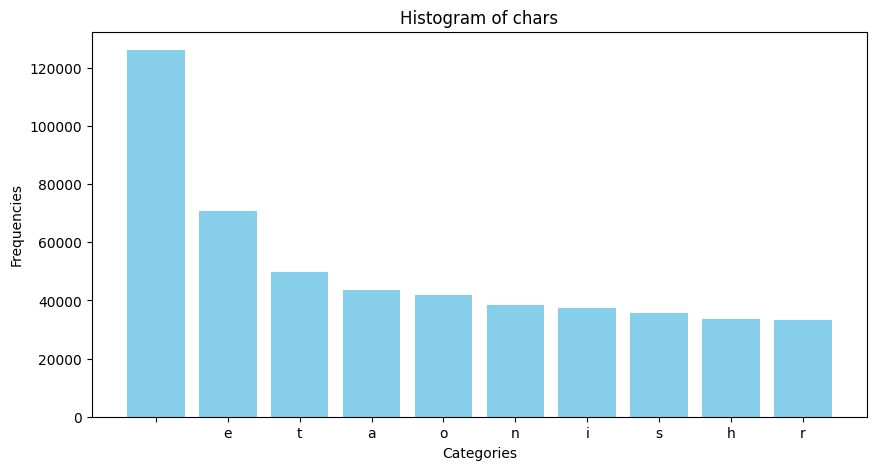

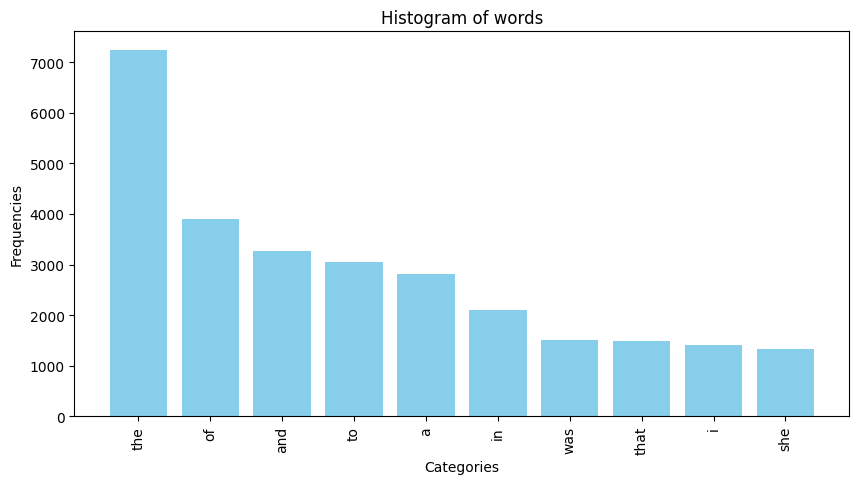

In [34]:
from plotting_utils import plot_histogram

# what we already have
def word_frequency(sentence):
    words = sentence.lower().split(' ')
    
    word_freq = {}
    for word in words:
        if word:
            word_freq[word] = 0
    
    for word in words:
        if word:
            word_freq[word] += 1
    
    return word_freq

def load_file(file_path):
    with open(file_path, 'r') as f:
        context = f.read()
    return context

def clean_text(text):
    # remove extra spaces
    cleaned_text = ' '.join(text.split())
    # split the text into sentences.
    return cleaned_text.split('.')

# Solution:
def char_frequency(text):
    char_freq = {}
    for char in text:
        char_freq[char] = 0
    
    for char in text:
        char_freq[char] += 1
    
    return char_freq

# dictionary merging fuction
def merge_dict(dict1, dict2):
    if dict1 is None:
        return dict2
    elif dict2 is None:
        return dict1
    
    for key, value in dict2.items():
        if key in dict1:
            dict1[key] += value
        else:
            dict1[key] = value
    return dict1

# Test
context = load_file('book2.txt')
cleaned_sentences = clean_text(context)

char_dict = dict()
word_dict = dict()
for sentence in cleaned_sentences:
    char_dict_2 = char_frequency(sentence)
    char_dict = merge_dict(char_dict, char_dict_2)
    
    word_dict_2 = word_frequency(sentence)
    word_dict = merge_dict(word_dict, word_dict_2)

plot_histogram(char_dict, 'chars', top_k=10)
plot_histogram(word_dict, 'words', top_k=10)

In [50]:
# Palindrom function
# remember the string operations from earlier exercises
# regex will be quite usefull in filtering empty spaces and punctuation marks

import re

def is_palindrome(sentence: str) -> bool:
    # Remove non-alphanumeric characters and convert to lowercase
    clean_sentence = re.sub(r'[^a-zA-Z0-9]', '', sentence).lower()
    print(clean_sentence)
    print(clean_sentence[::-1])
    # Check if the cleaned sentence is a palindrome
    return clean_sentence == clean_sentence[::-1]

# Test the function

sentence = "A man, a plan, a canal – Panama"
print(is_palindrome(sentence))


amanaplanacanalpanama
amanaplanacanalpanama
True


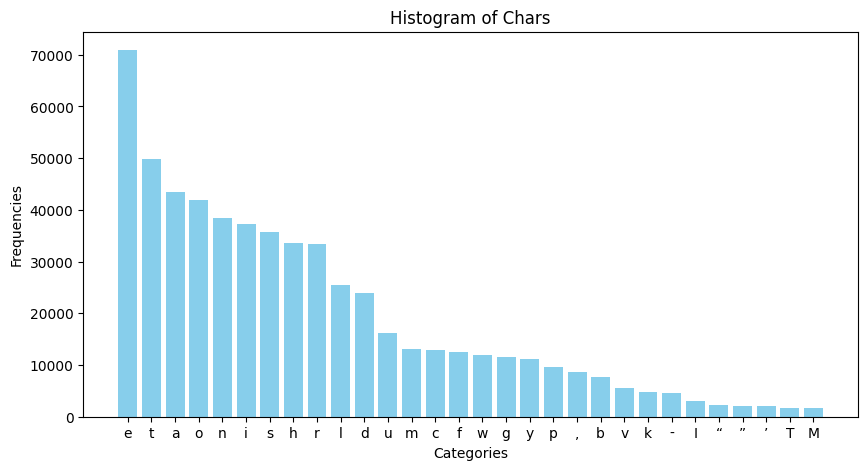

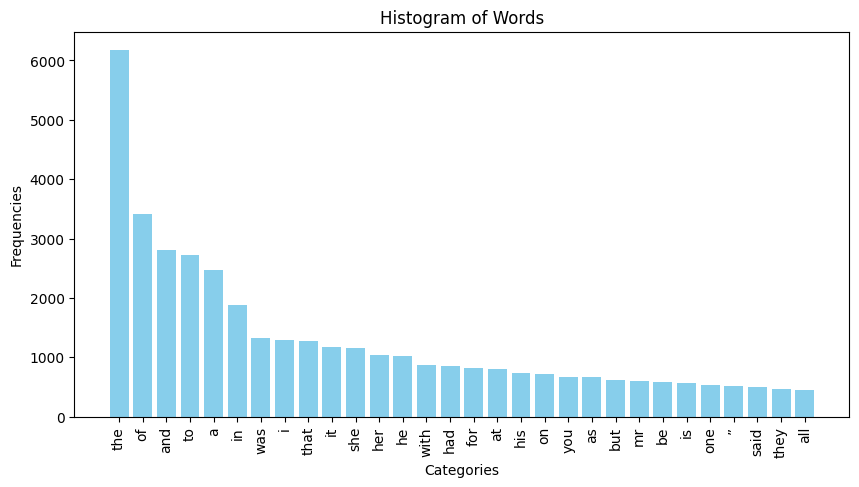

In [13]:
import re 
from plotting_utils import plot_histogram

def clean_text(text):
    text = re.sub('[\n\t]', '', text)     # clean spaces
    text = re.sub(' +', ' ', text)
    return text

def split_text(text):
    sentences = re.split("[.?!;:]", text)                # split when he encounters .\?!;: 
    sentences = [i.strip() for i in sentences if i.strip()!='']    # remove blank spaces
    return sentences 

def read_book(file_path):
    with open(file_path,'r') as f:
        book = f.read()
    return book

def char_frequency(sentences: list) -> dict:
    # sentences are a list of strings
    text = ''.join(sentences).replace(' ', '')

    char_freq = {}
    for char in text:
        char_freq[char] = 0

    for char in text: 
        char_freq[char] += 1

    return char_freq


def word_frequency(sentence: list) -> dict:
    words = ' '.join(sentence).lower().split(' ')
    # split text into words

    word_freq = {}
    for word in words: 
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1
    
    return word_freq


# test

text = read_book('book2.txt')
cleaned_text = clean_text(text)
sentences = split_text(cleaned_text)

# character frequency

char_freq = char_frequency(sentences)
plot_histogram(char_freq, 'Chars')

# word frequency

word_freq = word_frequency(sentences)
plot_histogram(word_freq, 'Words')
